# Loading word embeddings

In [1]:
import io
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ripser import Rips
from persim import plot_diagrams, bottleneck
from tqdm.notebook import tqdm

In [26]:
language_keys = {
# "latin": "la",
"greek": "el",
# "anglo": "an",
"korean": "ko",
"japanese" : "ja",
"chinese": "zh",
"turkish":"tr",
"norwegian":"no",
"catalan":"ca",
"romanian":"ro",
# "basque": "eu",
"dutch": "nl",
"sweden": "sv",
"russian": "ru",
"polish":"pl",
"english": "en",
"bulgarian":"bg",
"hungarian":"hu",
"finish":"fi",
"french":"fr",
"italian": "it",
"german":"de",
# "navajo":"nv",
"arabic":"ar",
"hindi":"hif",
"english": "en",
"spanish": "es"
}

# la
# an
# eu
# nv

from collections import defaultdict

cross_dict_dir = "data/crosslingual/dictionaries/"

In [27]:
len(language_keys)

22

In [18]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

# en-es.0-5000.txt     en-ru.0-5000.txt     fr-es.0-5000.txt     pt-de.0-5000.txt
# bn-en.5000-6500.txt               en-es.5000-6500.txt

def load_dict(dict_path="data/crosslingual/dictionaries/en-es.0-5000.txt"):
    
    return pd.read_csv(dict_path, names=["src", "tgt"], delim_whitespace=True)


def multi_key_dict(words, dict_):
    out = []
    for word in words:
        if word in dict_:
            out.append(dict_[word])
    return np.asarray(out)


def update_dict(dict_, keys, values, lang):
    for i in range(len(keys)):
        key = keys[i]
        value = values[i]
        if key in dict_:
            try:
                dict_[key][lang] += [value]
            except:
                import pdb; pdb.set_trace()
        else:
            dict_[key] = defaultdict(lambda: [])
            dict_[key][lang] = [value]
    return dict_


def filter_noverlap_words(vocab_old_en, vocab_old_lang, en_to_lang):
    vocab_new = []
    for i, word in enumerate(vocab_old_en):
        if word in en_to_lang and len(en_to_lang[word]) >= 22:
            vocab_new.append(vocab_old_lang[i])
        else:
            en_to_lang.pop(word, None)
    return vocab_new

from random import randint

def sample_in_all_langs(en_to_lang, num_samps=500):
    keys =  np.array(list(en_to_lang.keys()))
    print(keys)
    perm = np.random.permutation(len(keys))
    keys = keys[perm]
    
    words_per_lang = defaultdict(lambda: [])
    for i in range(num_samps):
        for lang in en_to_lang[keys[i]]:
            lst = en_to_lang[keys[i]][lang]
            num = randint(0, len(lst)-1)
            item = lst[num]
            words_per_lang[lang].append(item)
    return words_per_lang
    

In [13]:
en_to_lang = {}

for language, key_ in language_keys.items():
    
    if key_ == "hif": key_ = "hi"
    try:
        pds = load_dict("data/crosslingual/dictionaries/en-{0}.0-5000.txt".format(key_))
    except:
        print(key_)
        continue
    
    update_dict(en_to_lang, pds.src.values, pds.tgt.values , key_)

la
an
eu
nv


In [14]:
lang_vocab = {}

for language, key_ in language_keys.items():
    
    if key_ == "hif": key_ = "hi"
    try:#
        pds = load_dict("data/crosslingual/dictionaries/en-{0}.0-5000.txt".format(key_))
    except:
        print(key_)
        continue
    
    lang_vocab[key_] = filter_noverlap_words(pds.src.values, pds.tgt.values,  en_to_lang)

la
an
eu
nv


In [15]:
list(map(len , lang_vocab.values()))

[4836,
 3779,
 3320,
 4056,
 4558,
 4263,
 2784,
 5207,
 4104,
 5049,
 4987,
 5681,
 2023,
 4752,
 4323,
 5435,
 4594,
 4133,
 6417,
 5446,
 4088,
 5114]

In [16]:
en_to_lang["dog"]

defaultdict(<function __main__.update_dict.<locals>.<lambda>()>,
            {'el': ['σκύλος', 'σκυλί'],
             'ko': ['개그'],
             'ja': ['イヌ'],
             'zh': ['竇', '犬', '狗'],
             'tr': ['köpek'],
             'no': ['bikkje', 'hund', 'bikkja'],
             'ca': ['gos'],
             'ro': ['câine', 'dog', 'caine'],
             'nl': ['hond', 'hondje'],
             'sv': ['hund'],
             'ru': ['собака', 'пес', 'пёс'],
             'pl': ['psie', 'psy', 'pies', 'piesek'],
             'en': ['dog'],
             'bg': ['куче', 'кучето', 'дог'],
             'hu': ['kutyus', 'kutya'],
             'fi': ['koiran', 'koira'],
             'fr': ['chiens', 'chien', 'chienne'],
             'it': ['cane'],
             'de': ['hund', 'hunde', 'hündin'],
             'ar': ['الكلب', 'كلب'],
             'hi': ['डॉग', 'कुत्ता', 'कुत्ते', 'श्वान'],
             'es': ['perrita', 'perro', 'perros']})

In [19]:
samps =  sample_in_all_langs(en_to_lang)

['from' 'this' 'but' ... 'registration' 'trans' 'terrorist']


In [20]:
len(en_to_lang)

2023

In [21]:
list(map(len, samps.values()))

[500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500]

In [42]:
# load en-xx dictionaries for subword selection
sub_sampled_embedings_per_lang = {}
word2id_per_lang = {}
id2word_per_lang = {}

nmax = 50000  # maximum number of word embeddings to load


# Load reduced dictionaries for each language lang based on the en-lang dictionaries
for language, key_ in language_keys.items():
    
    
    embeddings, id2word_per_lang[key_] , word2id_per_lang[key_]= load_vec('data/wiki.{0}.vec'.format(key_), nmax)
#     if key_ == "hif": key_ = "hi"
    ids = multi_key_dict(samps["hi" if key_=="hif" else key_],  word2id_per_lang[key_])
    sub_sampled_embedings_per_lang[key_] = embeddings[ids,:]
    
    del embeddings
    
    print(language)

greek
korean
japanese
chinese
turkish
norwegian
catalan
romanian
dutch
sweden
russian
polish
english
bulgarian
hungarian
finish
french
italian
german
arabic
hindi
spanish


In [43]:
sub_sampled_embedings_per_lang.keys()

dict_keys(['el', 'ko', 'ja', 'zh', 'tr', 'no', 'ca', 'ro', 'nl', 'sv', 'ru', 'pl', 'en', 'bg', 'hu', 'fi', 'fr', 'it', 'de', 'ar', 'hif', 'es'])

In [44]:
sub_sampled_embedings_per_lang["en"].shape, len(sub_sampled_embedings_per_lang)

((500, 300), 22)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
13.710996389389038


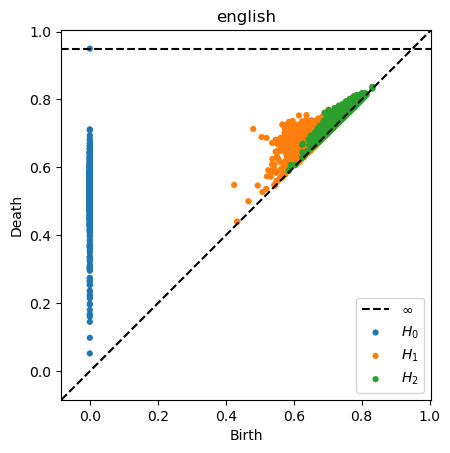

In [47]:
import time

start = time.time()

rips = Rips(maxdim=2)
data = sub_sampled_embedings_per_lang["en"]
diagrams = rips.fit_transform(data, metric="cosine")
rips.plot(diagrams)
plt.title("english")

end = time.time()
print(end - start)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Text(0.5, 1.0, 'spanish')

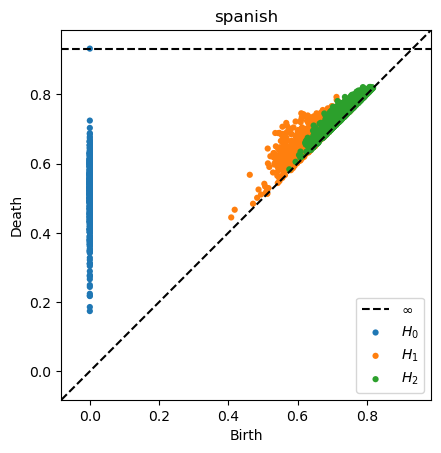

In [48]:
# %%time
rips_2 = Rips(maxdim=2)
data_2 = sub_sampled_embedings_per_lang["es"]
diagrams_2 = rips_2.fit_transform(data_2, metric="cosine")
rips.plot(diagrams_2)
plt.title("spanish")

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Text(0.5, 1.0, 'mandarin')

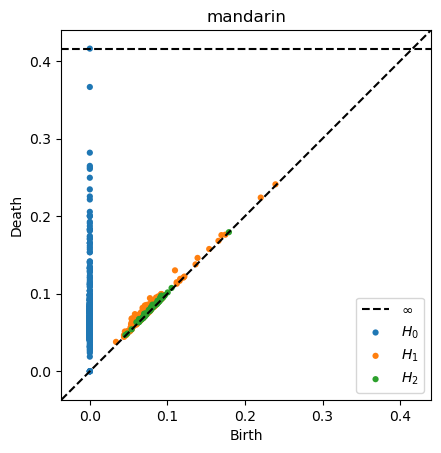

In [49]:
# %%time
rips_3 = Rips(maxdim=2)
data_3 = sub_sampled_embedings_per_lang["zh"]
diagrams_3 = rips_3.fit_transform(data_3, metric="cosine")
rips.plot(diagrams_3)
plt.title("mandarin")

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Text(0.5, 1.0, 'japanese')

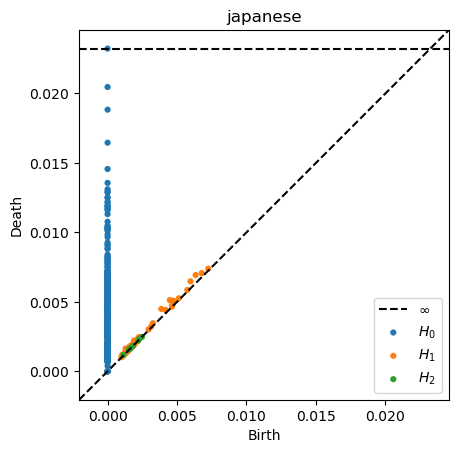

In [58]:
# %%time
rips_4 = Rips(maxdim=2)
data_4 = sub_sampled_embedings_per_lang["ja"]
diagrams_4 = rips_4.fit_transform(data_4, metric="cosine")
rips.plot(diagrams_4)
plt.title("japanese")

Text(0.5, 1.0, 'Japanese')

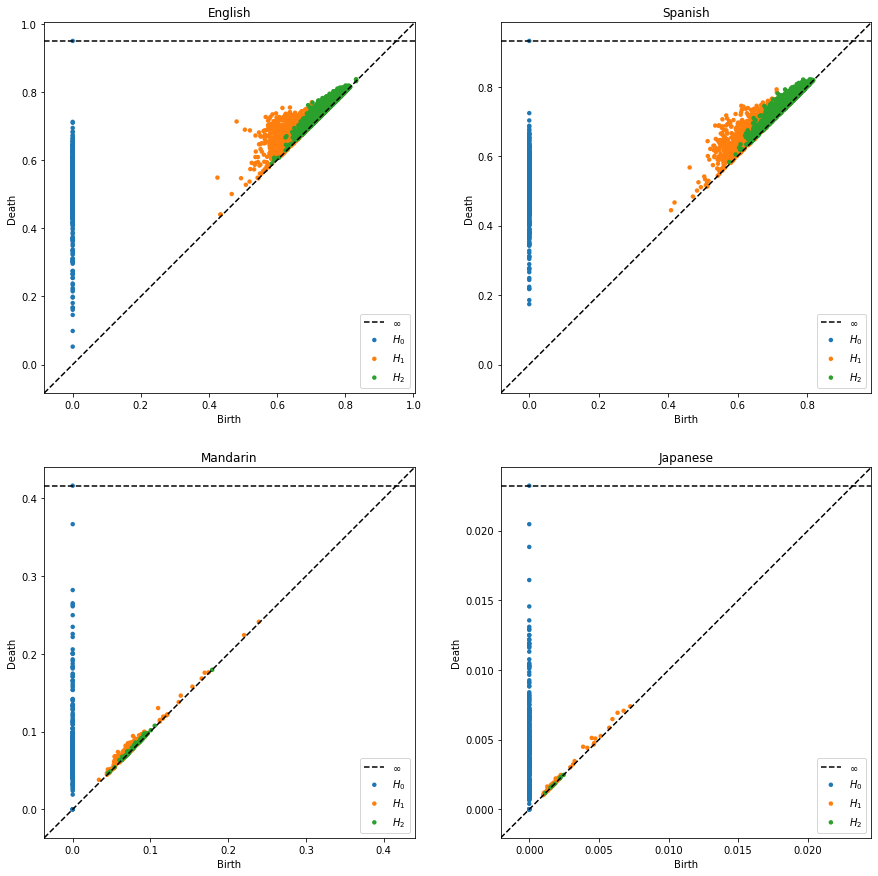

In [82]:
%matplotlib inline

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=False, figsize=(15,15))

plt.axes(ax1)
rips.plot(diagrams)
plt.title("English")
plt.axes(ax2)
rips.plot(diagrams_2)
plt.title("Spanish")
plt.axes(ax3)
rips.plot(diagrams_3)
plt.title("Mandarin")
plt.axes(ax4)
rips.plot(diagrams_4)
plt.title("Japanese")

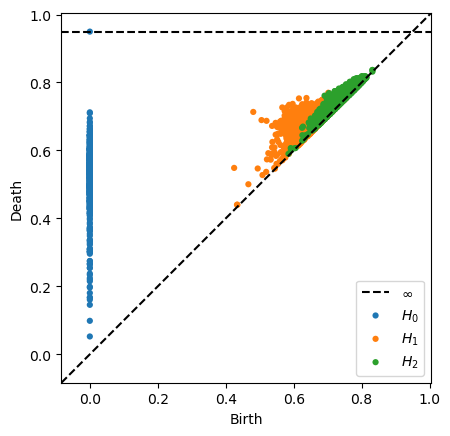

In [51]:
rips.plot(diagrams)


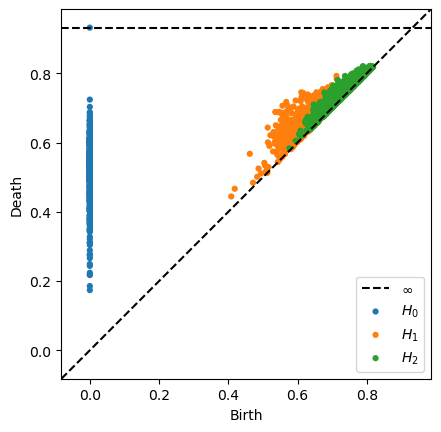

In [52]:
rips.plot(diagrams_2)


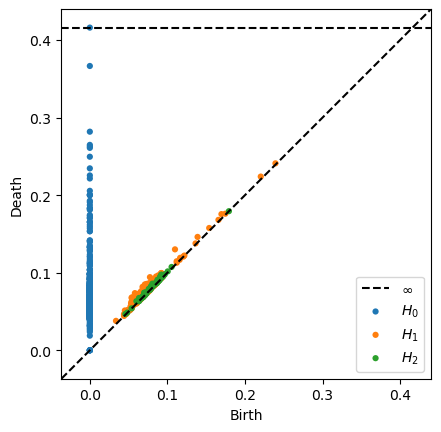

In [53]:
rips.plot(diagrams_3)
